## Mean / Median imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

**Note the following**:

- If a variable is normally distributed, the mean, median and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for  numerical variables.
- If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
- For discrete variables casted as 'int' (to save memory), the mean may not be an integer, therefore the whole variable will be re-casted as 'float'. In order to avoid this behaviour, we can replace NA with the median instead. The median will inevitably be an integer / discrete value as well.


### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore these methods are suitable for continuous and discrete numerical variables only.


### Assumptions

- Data is missing completely at random (MCAR)
- The missing observations, most likely look like the majority of the observations in the variable (aka, the mean / median)

If data is missing completely at random, then it is fair to assume that the missing values, are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent / average observation.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)

### Limitations

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset

When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.

In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. Mean / median imputation may alter intrinsic correlations since the mean / median value that now replaces the missing data will not necessarily preserve the relation with the remaining variables.

Finally, concentrating all missing values at the mean / median value, may lead to observations that are common occurrences in the distribution, to be picked up as outliers.


### When to use mean / median imputation?

- Data is missing completely at random
- No more than 5% of the variable contains missing data

Although in theory, the above conditions should be met to minimise the impact of this imputation technique, in practice, mean / median imputation is very commonly used, even in those cases when data is not MCAR and there are a lot of missing values. The reason behind this, is the simplicity of the technique.


### Final note

Replacement of NA with mean / median is widely used in the data science community and in various data science competitions. See for example the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"]( http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Typically, mean / median imputation is done together with adding a binary "missing indicator" variable to capture those observations where the data was missing (see lecture "Missing Indicator"), thus covering 2 angles: if the data was missing completely at random, this would be captured by the mean /median imputation, and if it wasn't this would be captured by the additional "missing indicator" variable. Both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions.

## In this demo:

We will learn how to perform mean and median imputation using pandas on the Titanic Dataset.

-

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## Titanic

In [12]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [13]:
data = pd.read_csv('titanic.csv')

In [14]:
# Find the percentage of NA

data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

The only variable with missing data is Age, with ~20% of missing observations.

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [15]:
# Separate into training (70%) and testing (30%) set and find the shape of the data

train, test=train_test_split(data[["age","fare"]],test_size=0.3)

print(train.shape, test.shape)

(916, 2) (393, 2)


In [16]:
# Explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

train.isnull().mean()

age     0.20524
fare    0.00000
dtype: float64

In [17]:
# Create a function to fill missing values with the mean or median:
# the variable takes the dataframe, the variable, and the value of the
# mean or median
# and returns the variable with the filled na

def nullFiller(dt, variable, new_val):
  return dt[variable].fillna(new_val)

In [18]:
# calculate the median Age
train["age"].median()

28.0

In [19]:
# calculate the mean Age

train["age"].mean()

29.676511126373622

In [24]:
# create a new variable with the missing values replaced
# using the function we created above

# first replace with the median
train["age_median"]=nullFiller(train,"age",train["age"].median())

# now replace with the mean
train["age_mean"]=nullFiller(train,"age",train["age"].mean())

# the mean contains many decimals, so you need to round to 1
# using the round function from numpy and show 15 rows

train.head(15)

,age,fare,age_median,age_mean
915,22.0,7.5208,22.0,22.0
617,25.0,7.0500,25.0,25.0
832,43.0,46.9000,43.0,43.0
81,70.0,71.0000,70.0,70.0
1108,19.0,14.5000,19.0,19.0
72,26.0,136.7792,26.0,26.0
308,55.0,135.6333,55.0,55.0
1296,27.0,8.6625,27.0,27.0
367,52.0,13.5000,52.0,52.0
395,18.0,23.0000,18.0,18.0


Look at the rows with missing data (NaN) in Age, and see how in the new variables those were replaced by either 28 (median) or 30 (mean).

In [26]:
# Show the change in the variance after mean / median imputation
# Change is expected, because the percentage of missing data is quite
# high in Age, ~20%
print("Original variable variance:",train["age"].var())
print("Variance after median impulation:",train["age_median"].var())
print("Variance after mean imputation:",train["age_mean"].var())


Original variable variance: 203.20580199045366
Variance after median impulation: 161.9131986859187
Variance after mean imputation: 161.45422737383595


As expected, the variance is underestimated, because now many values are the same ==> either the mean or the median value.

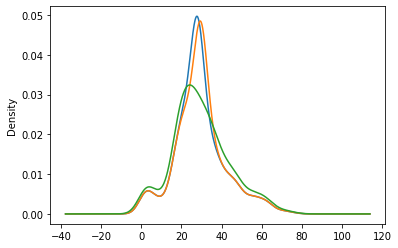

In [27]:
# Now, show that the distribution has changed 
# with now more values accumulating towards the median
# or median

train["age_median"].plot.kde()
train["age_mean"].plot.kde()
train["age"].plot.kde()

As mentioned above, the mean / median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

**Is this important?**

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Mean / median imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

In [28]:
# Check and confirm that mean / median imputation may affect the relationship 
# with the other variables in the dataset: use Covariance

train.cov()


,age,fare,age_median,age_mean
age,203.205802,165.348049,203.205802,203.205802
fare,165.348049,3083.842242,135.722563,131.374898
age_median,203.205802,135.722563,161.913199,161.454227
age_mean,203.205802,131.374898,161.454227,161.454227


We see indeed that the covariance between Age and Fare is changed after the mean / median imputation.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


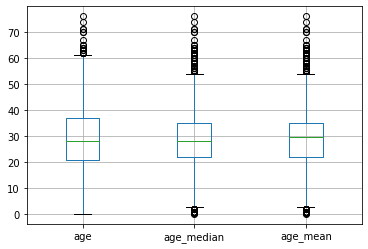

In [29]:
# Crosscheck that mean / median imputation lead 
# to observations that are normal, to look like outliers by using boxplot i.e., in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers

train.boxplot(column=['age','age_median','age_mean'])

From the boxplot above, we can see that after the imputation not only we have more outliers on the higher Age values, but we have now outliers as well for the lower values of Age.

**Is this important?**

If we are after true outliers, we need to keep this behaviour in mind, to make sure that we are neither masking nor creating artificial outliers with our imputation technique. In practice, we normally don't check for this behaviour at all. But I think it is important to know that is happening.
